In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df['Gender'] = df['Gender'].replace('Male',1).replace("Female" , 0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


Text(0, 0.5, 'Count')

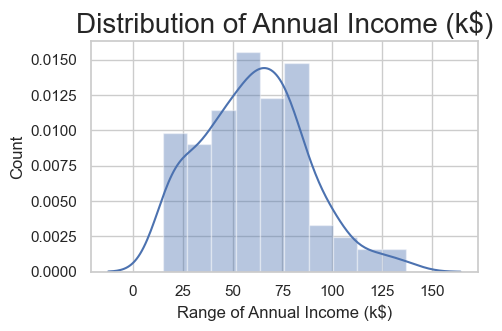

In [4]:
#Distribution of Annnual Income

plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

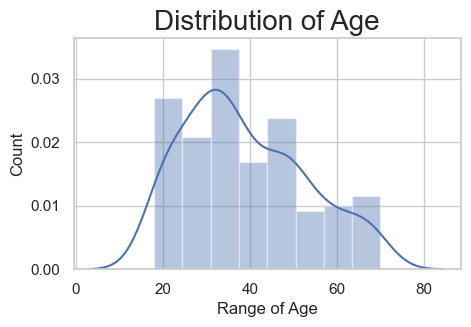

In [5]:
#Distribution of age

plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

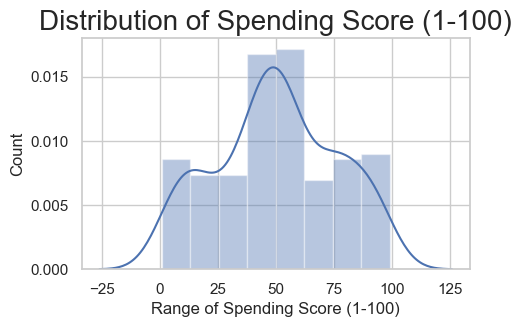

In [6]:
#Distribution of spending score

plt.figure(figsize=(5, 3))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

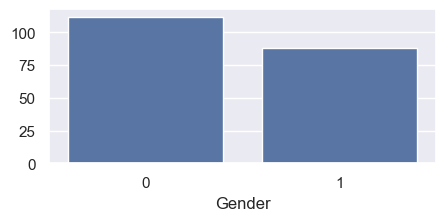

In [7]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,2))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

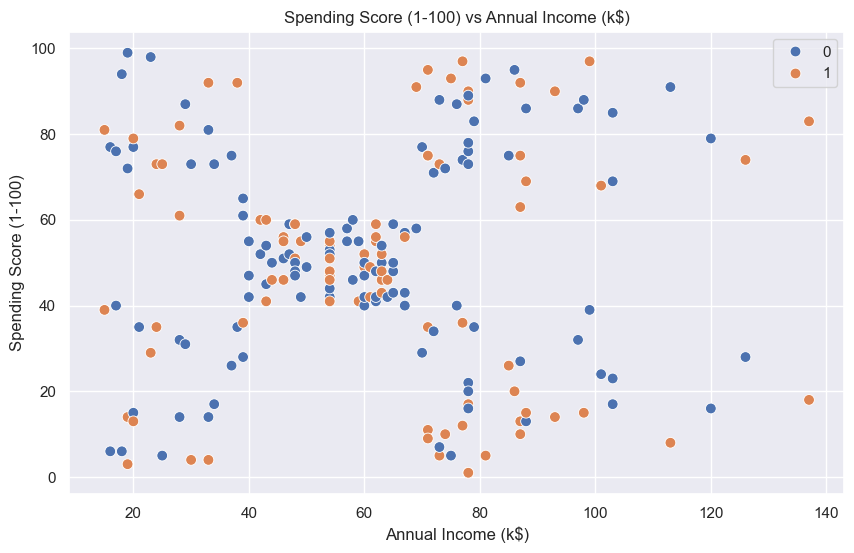

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
# Ensure data types are correct
df['Annual Income (k$)'] = pd.to_numeric(df['Annual Income (k$)'])
df['Spending Score (1-100)'] = pd.to_numeric(df['Spending Score (1-100)'])

In [12]:
df.shape

(200, 5)

In [13]:
from sklearn.cluster import KMeans

wcss=[]
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X, y=None, sample_weight=None)
    wcss.append(km.inertia_)
wcss    

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29858.483597603943,
 22209.851608025543,
 20786.93669205916,
 18612.222868009685,
 17083.67250170932,
 16511.947370563892,
 15599.148331445118]

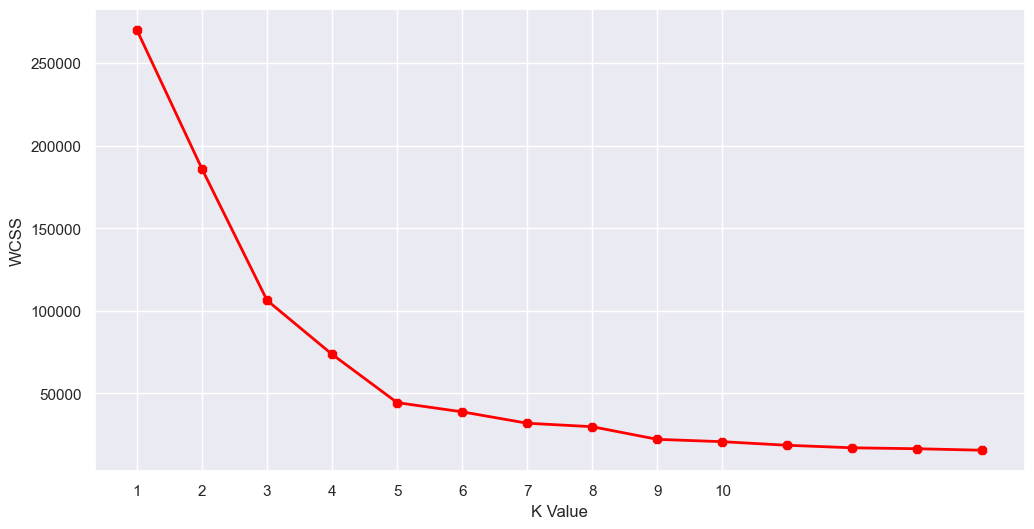

In [14]:
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [16]:
km_final=KMeans(n_clusters=5, init ='k-means++')
km_final.fit(X)

KMeans(n_clusters=5)

In [17]:
df["label"] = km_final.predict(X)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,4
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


In [18]:
df["label"].value_counts()

label
3    81
0    39
2    35
4    23
1    22
Name: count, dtype: int64

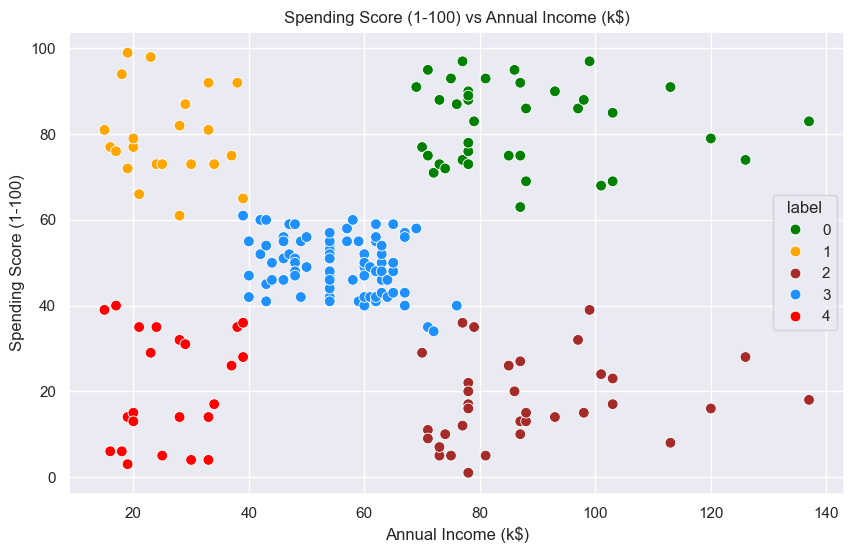

In [19]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [20]:
df['label'] = df['label'].replace({
    0: 'High-Income-High-Spend',
    1: 'Low-Income-High-Spend',
    2: 'High-Income-Low-Spend',
    3: 'Neutral',
    4: 'Low-Income-Low-Spend'
})        

In [21]:
df['label'] = df['label'].replace(0,'Female').replace(1 , 'Male')

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,Low-Income-Low-Spend
1,2,1,21,15,81,Low-Income-High-Spend
2,3,0,20,16,6,Low-Income-Low-Spend
3,4,0,23,16,77,Low-Income-High-Spend
4,5,0,31,17,40,Low-Income-Low-Spend


In [24]:
df_Low_Income_High_Spend = df[(df['label'] == 'Low-Income-High-Spend')] 
df_Low_Income_High_Spend

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
1,2,1,21,15,81,Low-Income-High-Spend
3,4,0,23,16,77,Low-Income-High-Spend
5,6,0,22,17,76,Low-Income-High-Spend
7,8,0,23,18,94,Low-Income-High-Spend
9,10,0,30,19,72,Low-Income-High-Spend
11,12,0,35,19,99,Low-Income-High-Spend
13,14,0,24,20,77,Low-Income-High-Spend
15,16,1,22,20,79,Low-Income-High-Spend
17,18,1,20,21,66,Low-Income-High-Spend
19,20,0,35,23,98,Low-Income-High-Spend


In [25]:
df_Low_Income_High_Spend.to_csv('df_Low_Income_High_Spend.csv')

# with 6 clusters 

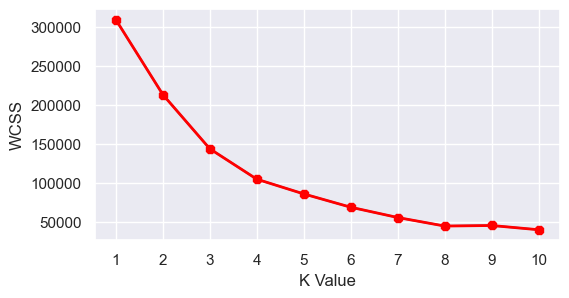

KMeans(n_clusters=6)

In [26]:
from sklearn.cluster import KMeans

df_all = pd.read_csv('Mall_Customers.csv')
df_all['Gender'] = df_all['Gender'].replace('Male',1).replace("Female" , 0)

wcss_all=[]
X_all = df_all[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

for i in range(1,11):
    km_all=KMeans(n_clusters=i,init ='k-means++')
    km_all.fit(X_all)
    wcss_all.append(km_all.inertia_)
  


#The elbow curve

plt.figure(figsize=(6,3))
plt.plot(range(1,11),wcss_all)
plt.plot(range(1,11),wcss_all, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


km_all_final=KMeans(n_clusters=6, init ='k-means++')
km_all_final.fit(X_all)


In [27]:
df_all["label"] = km_all_final.predict(X_all)
df_all.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


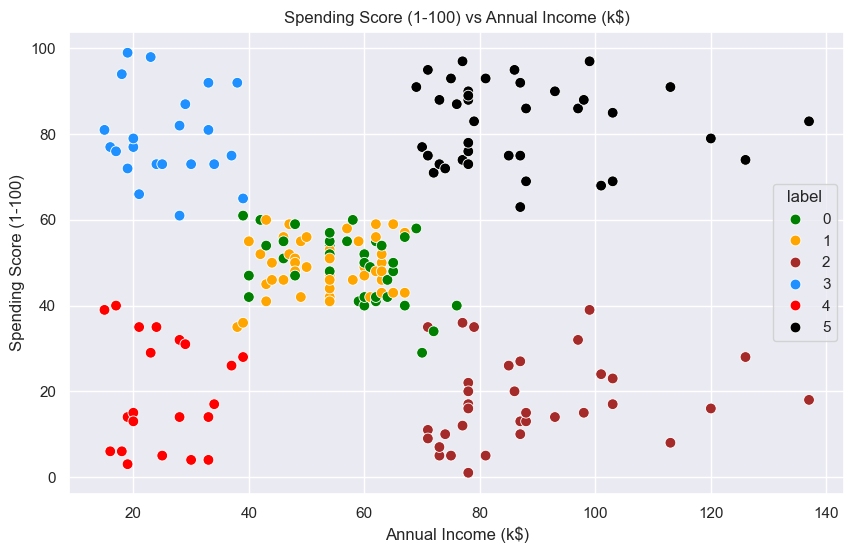

In [28]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red','black'], legend='full',data = df_all  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# by selecting wrong number of clusters we arrived at a wrong confusing point 